# 상관관계 분석 #

자세하게는 만들지 않았습니다. 깊이 있는 분석은 책 또는 구글링에 자료가 더 많습니다

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc

/Users/seoghyeonjin/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/seoghyeonjin/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [2]:
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False #이걸로 해야 한글이 안깨임

In [3]:
# CSV 파일 불러오기
df = pd.read_csv('train2.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    int64  
 3   Age          714 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Survived     891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


In [5]:
df.keys()

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Survived'],
      dtype='object')

In [6]:
# datetime 열 제외
df = df.drop(columns=['PassengerId'])

# 피어슨 상관관계 계산
correlation_matrix = df.corr()

# center 열을 종속변수로 설정
dependent_variable = 'Survived'

# center 열과의 상관관계만 선택
correlation_with_dependent = correlation_matrix[dependent_variable]

# 가장 높은 상관관계를 가진 변수 5개 추출
top_correlations = correlation_with_dependent.abs().nlargest(6)[1:]

In [7]:
# 결과 출력
print("피어슨 상관관계 결과:")
print(correlation_with_dependent)

# 가장 높은 상관관계를 가진 변수 5개 출력
print("\n상관관계가 가장 높은 변수 5개:")
for variable, correlation in top_correlations.items():
    print(f"{variable}: {correlation:.3f}")

피어슨 상관관계 결과:
Pclass     -0.338481
Sex         0.543351
Age        -0.077221
SibSp      -0.035322
Parch       0.081629
Fare        0.257307
Survived    1.000000
Name: Survived, dtype: float64

상관관계가 가장 높은 변수 5개:
Sex: 0.543
Pclass: 0.338
Fare: 0.257
Parch: 0.082
Age: 0.077


Text(0.5, 1.0, '상관관계 히트맵')

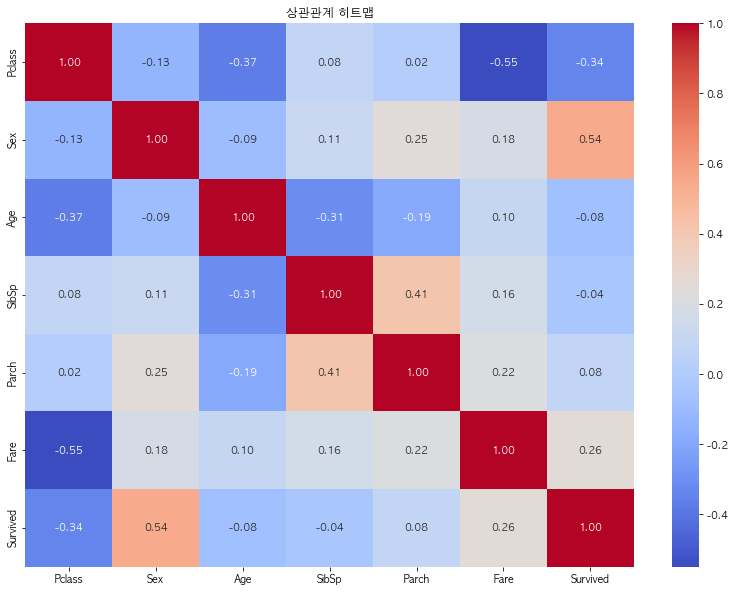

In [17]:
# 시각화 - 히트맵
plt.figure(figsize=(30, 10))
plt.subplot(1, 2, 1)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('상관관계 히트맵')

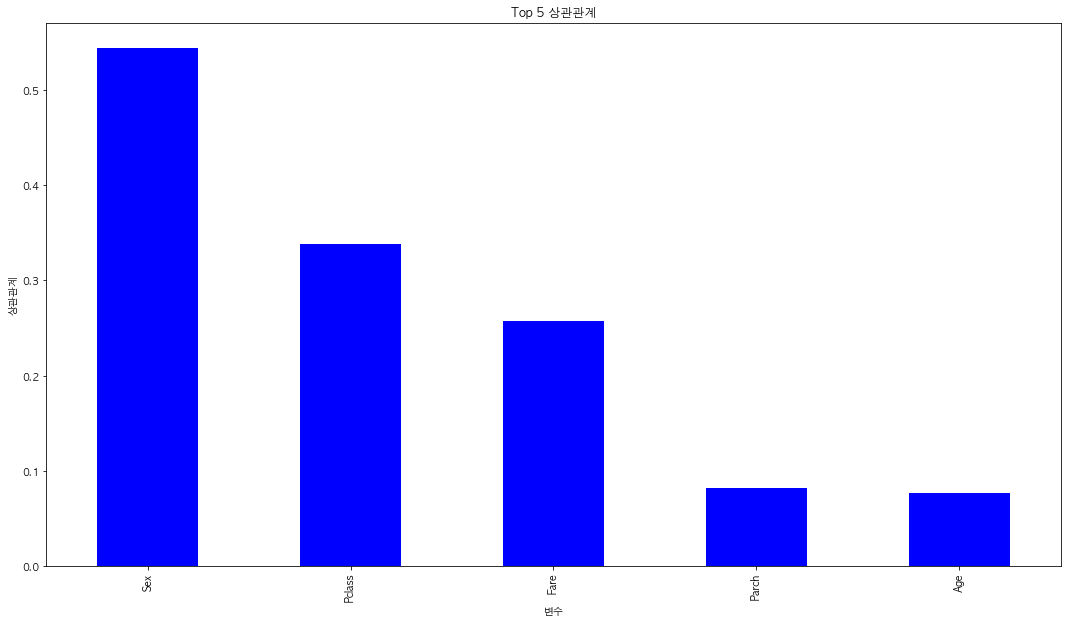

In [15]:
# 시각화 - 막대 그래프
plt.figure(figsize=(40, 10))
plt.subplot(1, 2, 2)
top_correlations.plot(kind='bar', color='blue')
plt.title('Top 5 상관관계')
plt.ylabel('상관관계')
plt.xlabel('변수')
plt.show()